# Boosting

In [42]:
# !pip install xgboost -q

In [43]:
# imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier


In [44]:
# load the data
df = sns.load_dataset('iris')
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


<Axes: xlabel='sepal_length', ylabel='sepal_width'>

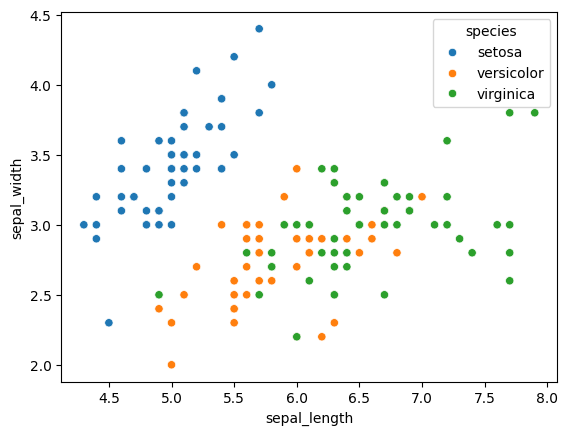

In [45]:
# scatter plot of the data
sns.scatterplot(x='sepal_length', y='sepal_width', hue='species', data=df)

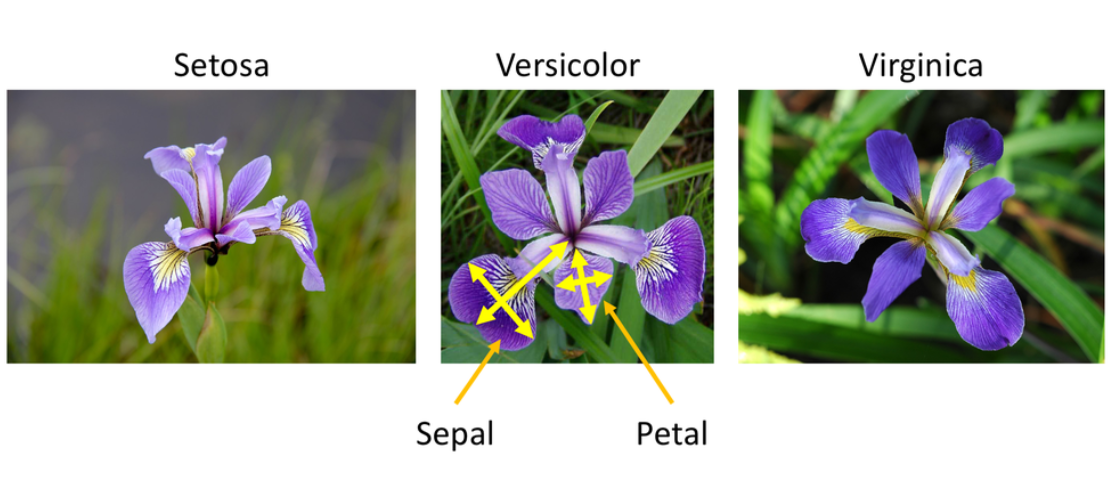

In [46]:
# split the data into features and target
X = df.drop('species', axis=1)
y = df['species']

# label encoding the target
le = LabelEncoder()
y = le.fit_transform(y)

# train test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)



In [47]:
%%time
# train the decision tree model
dt = DecisionTreeClassifier()
dt.fit(X_train, y_train)

# make predictions
y_pred = dt.predict(X_test)

# evaluate the model
print('Decision Tree Classifier')
print('Accuracy:', accuracy_score(y_test, y_pred))
print('Precision:', precision_score(y_test, y_pred, average='micro'))
print('Recall:', recall_score(y_test, y_pred, average='micro'))
print('F1 Score:', f1_score(y_test, y_pred, average='micro'))



Decision Tree Classifier
Accuracy: 0.9666666666666667
Precision: 0.9666666666666667
Recall: 0.9666666666666667
F1 Score: 0.9666666666666667
CPU times: total: 31.2 ms
Wall time: 32.4 ms


In [48]:
%%time
# train the RandomForestClassifier tree model
dt = RandomForestClassifier()
dt.fit(X_train, y_train)

# make predictions
y_pred = dt.predict(X_test)

# evaluate the model
print('Random Forest Classifier')
print('Accuracy:', accuracy_score(y_test, y_pred))
print('Precision:', precision_score(y_test, y_pred, average='micro'))
print('Recall:', recall_score(y_test, y_pred, average='micro'))
print('F1 Score:', f1_score(y_test, y_pred, average='micro'))

Random Forest Classifier
Accuracy: 0.9666666666666667
Precision: 0.9666666666666667
Recall: 0.9666666666666667
F1 Score: 0.9666666666666667
CPU times: total: 609 ms
Wall time: 718 ms


In [49]:
%%time
# train the XGBoost tree model
dt = XGBClassifier()
dt.fit(X_train, y_train)

# make predictions
y_pred = dt.predict(X_test)

# evaluate the model
print('XGBoost Classifier')
print('Accuracy:', accuracy_score(y_test, y_pred))
print('Precision:', precision_score(y_test, y_pred, average='micro'))
print('Recall:', recall_score(y_test, y_pred, average='micro'))
print('F1 Score:', f1_score(y_test, y_pred, average='micro'))

XGBoost Classifier
Accuracy: 0.9333333333333333
Precision: 0.9333333333333333
Recall: 0.9333333333333333
F1 Score: 0.9333333333333333
CPU times: total: 1.19 s
Wall time: 334 ms


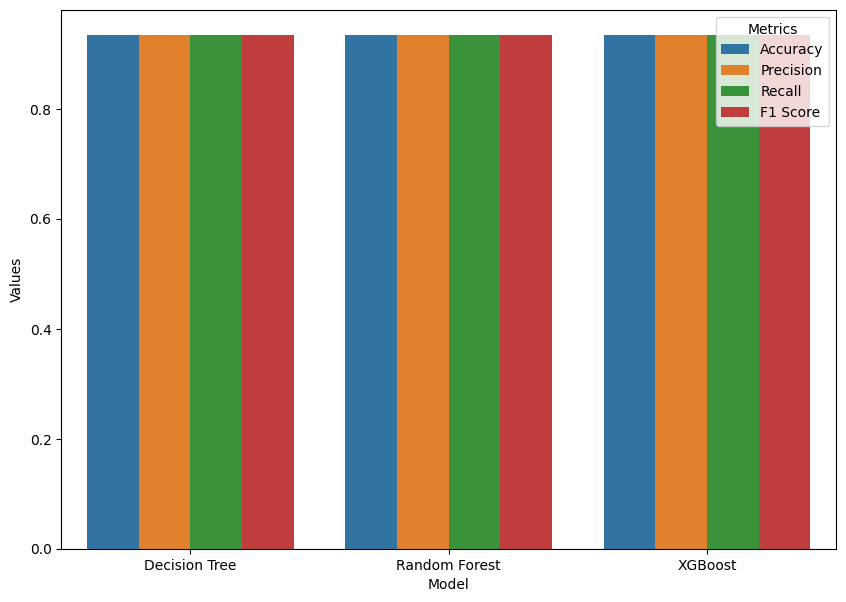

In [50]:
# make a bar plot showing each of the metrix with respect to the model
models = ['Decision Tree', 'Random Forest', 'XGBoost']
accuracy = [accuracy_score(y_test, y_pred), accuracy_score(y_test, y_pred), accuracy_score(y_test, y_pred)]
precision = [precision_score(y_test, y_pred, average='micro'), precision_score(y_test, y_pred, average='micro'), precision_score(y_test, y_pred, average='micro')]
recall = [recall_score(y_test, y_pred, average='micro'), recall_score(y_test, y_pred, average='micro'), recall_score(y_test, y_pred, average='micro')]
f1 = [f1_score(y_test, y_pred, average='micro'), f1_score(y_test, y_pred, average='micro'), f1_score(y_test, y_pred, average='micro')]
df = pd.DataFrame({'Model': models, 'Accuracy': accuracy, 'Precision': precision, 'Recall': recall, 'F1 Score': f1})
df = df.melt('Model', var_name='Metrics', value_name='Values')
plt.figure(figsize=(10, 7))
sns.barplot(x='Model', y='Values', hue='Metrics', data=df)
plt.show()
